In [ ]:
# Google.colab drive integration
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# specify the desired data location to the current working directory
%cd /content/drive/MyDrive/Dataset

/content/drive/.shortcut-targets-by-id/1hQJhZXCBbc369GWFH06FCrflHQ8EO2xS/Dataset


In [ ]:
# Keras prepocessing library
! pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
# Get the required Library
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2, VGG16

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [ ]:
batch_size = 32

In [ ]:
# Training Data Path and Image gen (Normalization)
TRAINING_DIR = "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Training"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation Data Path and Image gen (Normalization)
VALIDATION_DIR = "/content/drive/MyDrive/Dataset/DatasetV2/Dataset/Validation"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=batch_size
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=batch_size
)

Found 3446 images belonging to 13 classes.
Found 840 images belonging to 13 classes.


In [ ]:
# Just making sure the library to import things from G Drive Is present
from google.colab import drive
import os # Library to manipulate OS  I.E Copying, changing, and or reading things on folders

directoryTrain = '/content/drive/MyDrive/Dataset/DatasetV2/WikiArt Art Movements Styles/Sampled_Arts_1000' # Change directory depending on your file's path
directoryVal = '/content/drive/MyDrive/Dataset/DatasetV2/WikiArt Art Movements Styles/Sampled_Arts_200'

# List the contents of the directory
# Code to Check wether there is file's in the directory or not (Might be useful to debug)
try:
    files = os.listdir(directoryTrain)
    print("Files in directory:", files)
except FileNotFoundError:
    print(f"The directory {directoryTrain} does not exist.")

try:
    files = os.listdir(directoryVal)
    print("Files in directory:", files)
except FileNotFoundError:
    print(f"The directory {directoryVal} does not exist.")

Files in directory: ['Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism', 'Japanese_Art', 'Neoclassicism', 'Primitivism', 'Realism', 'Renaissance', 'Rococo', 'Romanticism', 'Symbolism', 'Abstract']
Files in directory: ['Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism', 'Japanese_Art', 'Neoclassicism', 'Primitivism', 'Realism', 'Renaissance', 'Rococo', 'Romanticism', 'Symbolism', 'Abstract']


In [ ]:
# Load training data
#train_data = tf.keras.utils.image_dataset_from_directory(
  #"/content/drive/MyDrive/Dataset/DatasetV2/WikiArt Art Movements Styles/Sampled_Arts_1000",
  #image_size=(224, 224),
  #batch_size=batch_size,
  #seed=123
#)

# Load validation data
#val_data = tf.keras.utils.image_dataset_from_directory(
  #"/content/drive/MyDrive/Dataset/DatasetV2/WikiArt Art Movements Styles/Sampled_Arts_200",
  #image_size=(224, 224),
  #batch_size=batch_size,
  #seed=123
#)

Found 12999 files belonging to 13 classes.
Found 2600 files belonging to 13 classes.


In [ ]:
# Use MobileNetV2 as the base model
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [ ]:
#Define the model
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(13, activation='softmax')  # Final output layer with 5 classes
])

In [ ]:
#Compile The Model
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

#Custom Callbacks

In [ ]:
class AccuracyThresholdCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print('\nReached 95% accuracy for both training and validation. Stopping training.')
            self.model.stop_training = True

callback = AccuracyThresholdCallback()

#Training Models

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[callback]
)

Epoch 1/10
107/107 [==============================] - 3081s 29s/step - loss: 1.3054 - accuracy: 0.5322 - val_loss: 1.0184 - val_accuracy: 0.6274
Epoch 2/10
107/107 [==============================] - 185s 2s/step - loss: 0.9207 - accuracy: 0.6749 - val_loss: 0.9776 - val_accuracy: 0.6454
Epoch 3/10
107/107 [==============================] - 193s 2s/step - loss: 0.8267 - accuracy: 0.7059 - val_loss: 0.9174 - val_accuracy: 0.6743
Epoch 4/10
107/107 [==============================] - 191s 2s/step - loss: 0.7496 - accuracy: 0.7358 - val_loss: 0.8775 - val_accuracy: 0.6863
Epoch 5/10
107/107 [==============================] - 187s 2s/step - loss: 0.6873 - accuracy: 0.7405 - val_loss: 0.8625 - val_accuracy: 0.6995
Epoch 6/10
107/107 [==============================] - 173s 2s/step - loss: 0.6513 - accuracy: 0.7665 - val_loss: 0.8390 - val_accuracy: 0.7188
Epoch 7/10
107/107 [==============================] - 173s 2s/step - loss: 0.6189 - accuracy: 0.7745 - val_loss: 0.7913 - val_accuracy: 0.73

In [13]:
# Save the model
model.save('model1_ArtNaon.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# You can also use this cell as a shortcut for downloading your model
from google.colab import files
files.download("model1_ArtNaon.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#The Confusion Matrix

27/27 [==============================] - 29s 1s/step


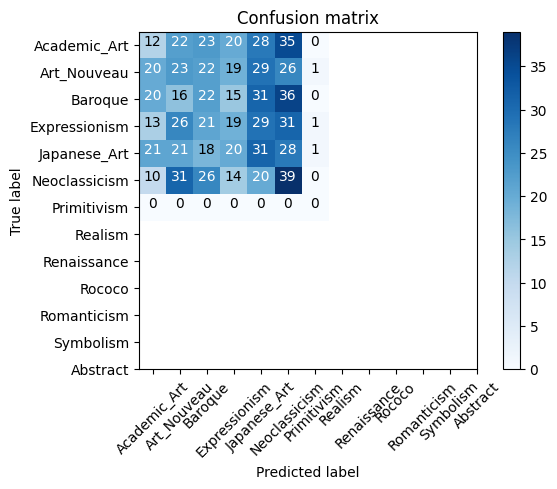

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(validation_generator, validation_generator.samples // batch_size+1)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert validation observations to one hot vectors
Y_true = validation_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Class names
class_names = ['Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism', 'Japanese_Art', 'Neoclassicism',
               'Primitivism', 'Realism', 'Renaissance', 'Rococo', 'Romanticism', 'Symbolism', 'Abstract']

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix with class names
plot_confusion_matrix(confusion_mtx, classes=class_names)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                1677      
                                                                 
Total params: 2423629 (9.25 MB)
Trainable params: 165645

In [18]:
class_indices = train_generator.class_indices
print(class_indices)

{'Abstract': 0, 'Academic_Art': 1, 'Art_Nouveau': 2, 'Baroque': 3, 'Expressionism': 4, 'Japanese_Art': 5, 'Neoclassicism': 6, 'Primitivism': 7, 'Realism': 8, 'Renaissance': 9, 'Rococo': 10, 'Romanticism': 11, 'Symbolism': 12}


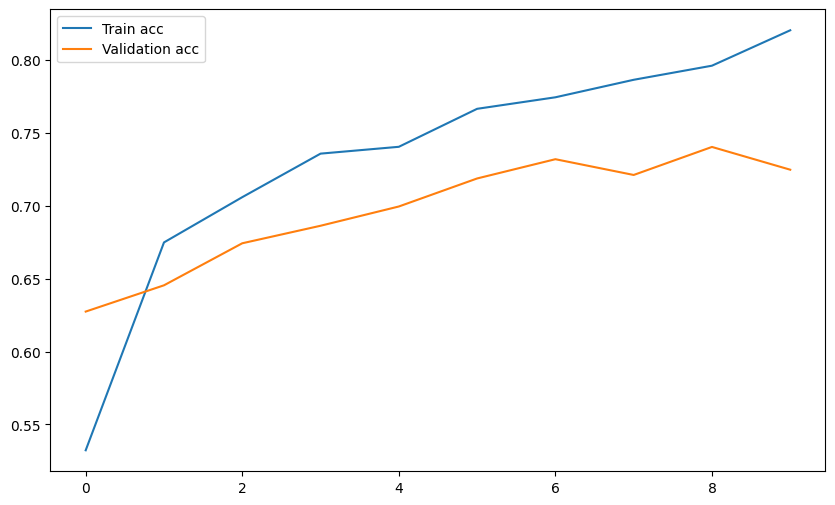

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

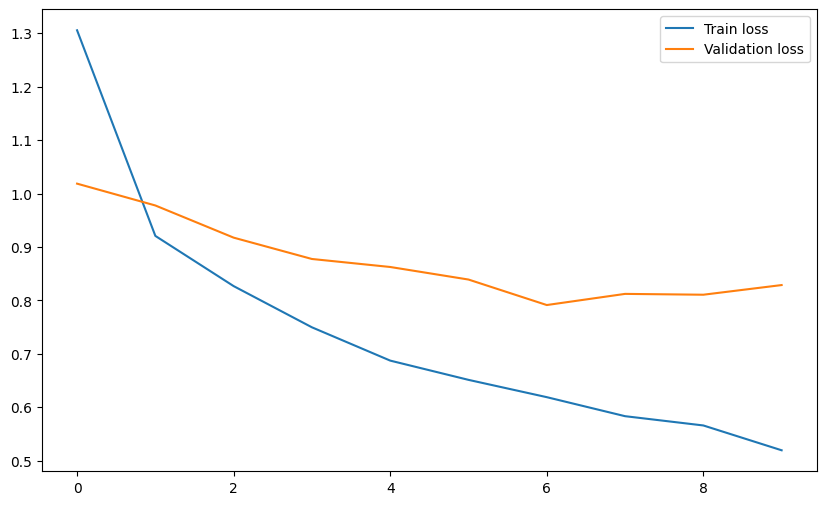

In [20]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

#Testing

1/1 [==============================] - 1s 812ms/step


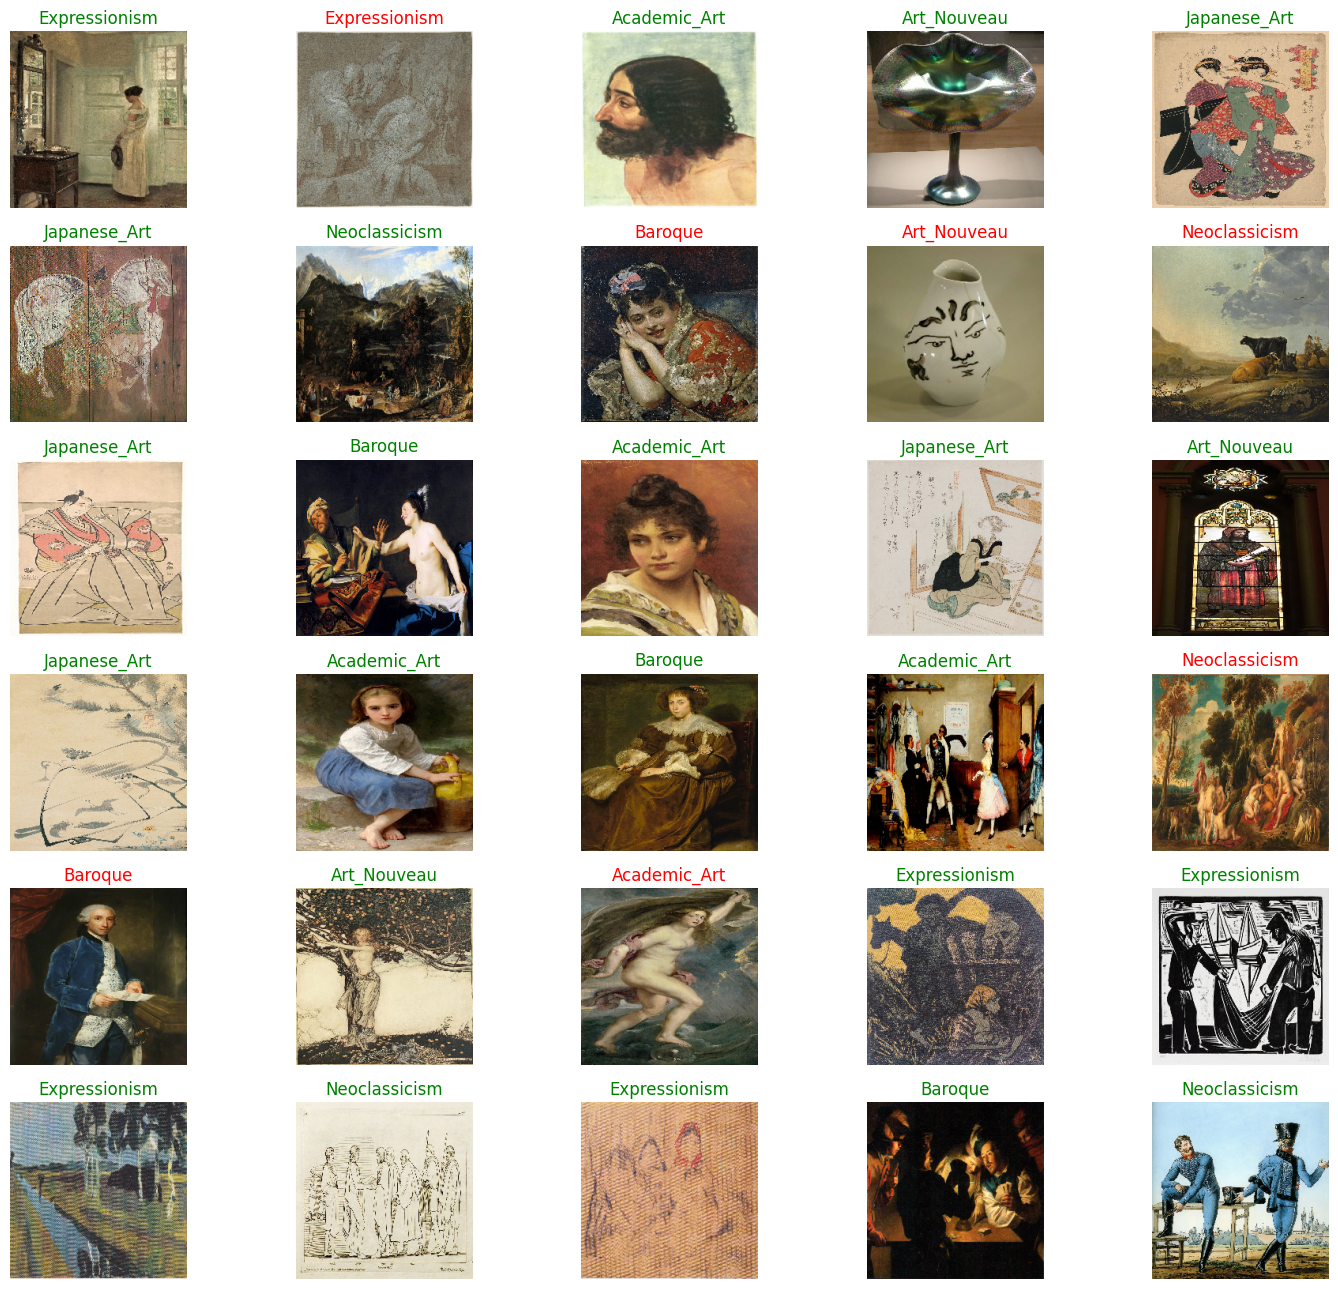

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/Model/model1_ArtNaon.h5')

# Assuming validation_generator is already set up and is part of the code that was provided
# Make sure to use the correct directory for the validation data
# validation_generator = ...

# Get a batch of images from the validation generator
img, labels = next(validation_generator)

# Define the class indices (mapping) as obtained previously
class_indices = {'Abstract': 0, 'Academic_Art': 1, 'Art_Nouveau': 2, 'Baroque': 3, 'Expressionism': 4, 'Japanese_Art': 5, 'Neoclassicism': 6,
                 'Primitivism': 7, 'Realism': 8, 'Renaissance': 9, 'Rococo': 10, 'Romanticism': 11, 'Symbolism': 12}
# Reverse the class indices dictionary to map indices to class names for display
indices_class = {v: k for k, v in class_indices.items()}

# Predict the class of each image in the batch
predictions = model.predict(img)

# Set up the figure for plotting images
plt.figure(figsize=(15, 13))

# Plot each image in the batch
for i in range(30):  # Assuming you want to plot 30 images
    ax = plt.subplot(6, 5, i + 1)  # Adjust the number of rows and cols accordingly
    plt.imshow(img[i])

    # Get the predicted and true labels
    predicted_label = indices_class[np.argmax(predictions[i])]
    true_label = indices_class[np.argmax(labels[i])]

    # Set the title of each plot to the predicted label
    # If the prediction is correct, the title is set in green; otherwise, it's set in red
    title_color = 'green' if predicted_label == true_label else 'red'
    plt.title(predicted_label, color=title_color)
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()